**Linear SVM - Marco Patiño and Armando Rodríguez**

In [ ]:
!pip install --upgrade --quiet eli5 

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import preprocessing      # Preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import classification_report
import eli5

Random state

In [ ]:
random_state = 10000

Read and split csv

In [ ]:
df = pd.read_csv('botNoBot2018_preprocessed.csv',lineterminator='\n')

Y = df["category"]
X = df.drop(columns="category", axis=1);

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.4, train_size=0.6, shuffle=True, stratify=Y, random_state=random_state);

Standardize data

In [ ]:
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

Default model

In [ ]:
knc = LinearSVC(random_state=random_state,max_iter=1000000)
knc.fit(Xtrain,Ytrain);
pred = knc.predict(Xtest);
print(sklearn.metrics.confusion_matrix(Ytest,pred));
print(sklearn.metrics.accuracy_score(Ytest,pred));
cvacc = cross_val_score(LinearSVC(random_state=random_state,max_iter=1000000), X=Xtrain,  y=Ytrain, cv=10, scoring='accuracy',n_jobs=-1)
print('Acc. 10-fold cross on train data= ', cvacc.mean())
print('Std. 10-fold cross on train data= ', cvacc.std())

[[1299  849]
 [ 428 1821]]
0.7095747100295656
Acc. 10-fold cross on train data=  0.7120133811560215
Std. 10-fold cross on train data=  0.013226840160838874


Grid search for tunning parameters

In [ ]:
Cs = [1000,2500,5000,7500,9000,10000,11000,12000,15000,20000,50000]

param_grid = {'C': Cs}
grid_search = GridSearchCV(LinearSVC(random_state=random_state,max_iter=1000000), param_grid, cv=10, n_jobs=-1)
#grid_search = GridSearchCV(SVC(kernel='linear',random_state=random_state), param_grid, cv=10, n_jobs=-1)
grid_search.fit(Xtrain,Ytrain)

# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_
cvacc = cross_val_score(LinearSVC(C=parval['C'],max_iter=1000000,random_state=random_state), X=Xtrain,  y=Ytrain, scoring='accuracy', cv=10, n_jobs=-1)
print('Acc. 10-fold cross on train data= ', cvacc.mean())

# Let's apply the best C parameter found to the test set
#knc = LinearSVC(C=parval['C']) 
knc = LinearSVC(C=parval['C'],random_state=random_state,max_iter=1000000)
knc.fit(Xtrain, Ytrain)
pred=knc.predict(Xtest)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(Ytest, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(Ytest, pred))
print("\nBest value of parameter C found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/Xtrain.shape[0])

Best model found

In [ ]:
knc = LinearSVC(C=12000,random_state=random_state,max_iter=1000000)
knc.fit(Xtrain,Ytrain);
pred = knc.predict(Xtest);
print(sklearn.metrics.confusion_matrix(Ytest,pred));
print(sklearn.metrics.accuracy_score(Ytest,pred));
cvacc = cross_val_score(LinearSVC(C=12000,random_state=random_state,max_iter=1000000), X=Xtrain,  y=Ytrain, cv=10, scoring='accuracy',n_jobs=-1)
print('Acc. 10-fold cross on train data= ', cvacc.mean())
print('Std. 10-fold cross on train data= ', cvacc.std())

[[1287  861]
 [ 416 1833]]
0.7095747100295656


/home/odnam/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Acc. 10-fold cross on train data=  0.7167144893548536
Std. 10-fold cross on train data=  0.015255175414818705


Linear weights importance

In [ ]:
eli5.sklearn.explain_linear_classifier_weights(knc,top=15,feature_names=list(X.columns))

Explanation(estimator='LinearSVC(C=12000, max_iter=1000000, random_state=10000)', description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='favourites_count', weight=0.5076692102096886, std=None, value=None), FeatureWeight(feature='profile_age', weight=0.3666691939073219, std=None, value=None), FeatureWeight(feature='friends_rate', weight=0.28868303477254453, std=None, value=None), FeatureWeight(feature='statuses_count', weight=0.23868415741277035, std=None, value=None), FeatureWeight(feature='default_profile', weight=0.049252963421597996, std=None, value=None), FeatureWeight(feature='profile_use_background_image', weight=0.02222362875786717, std=None, value=None), FeatureWeight(feature='listed_count', weight=0.009082627196871676, std=None, value=None)], neg=[FeatureWeight(feature='followers_count', weight=-1.7271314404968758, std=None, value=None), FeatureWeight(feature='friends_count', weight=-0.6619052215203765, std=None, value=None), FeatureWeight(feature='favourites_age_rate', weight=-0.5273896732871589, std=None, value=None), FeatureWeight(feature='statuses_age_rate', weight=-0.23288017779302295, std=None, value=None), FeatureWeight(feature='geo_enabled', weight=-0.10124601878438257, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=-0.09084405378001534, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

Classification report

In [ ]:
print(classification_report(Ytest,pred))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67      2148
           1       0.68      0.82      0.74      2249

    accuracy                           0.71      4397
   macro avg       0.72      0.71      0.71      4397
weighted avg       0.72      0.71      0.71      4397



ROC curves

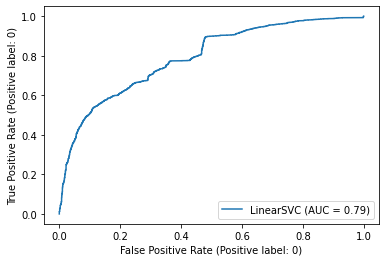

In [ ]:
RocCurveDisplay.from_estimator(knc, Xtest,Ytest, pos_label=0)